# Trabajo Final
### Integrantes Grupo 1:
*   Juan Pablo Arrázola
*   Paolo Brito
*   José Gutierrez
*   Horacio Molina

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# UPB POSGRADO ESTADÍSTICA APLICADA A CIENCIA DE DATOS TRABAJO FINAL Julio 2024 
### Tarea Estadística Inferencial

### 1. Carga el dataset de tu número de grupo de la carpeta base de datos de Moodle 

In [100]:
df=pd.read_csv('RetailNuevo1.csv')

In [101]:
df.shape

(2000, 14)

In [102]:
df.columns

Index(['Unnamed: 0', 'Ship Mode', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

### 2. Expresa las ventas segmentadas por estado, por modo de entrega (Ship Mode) y por subcategoría.

In [103]:
ventas_segmentadas = df.groupby(['State', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

ventas_segmentadas

,State,Ship Mode,Sub-Category,Sales
0,Alabama,Second Class,Accessories,1319.96
1,Alabama,Second Class,Art,15.47
2,Alabama,Second Class,Binders,22.75
3,Alabama,Second Class,Labels,491.55
4,Alabama,Second Class,Paper,629.10
...,...,...,...,...
803,Wisconsin,Standard Class,Binders,17.52
804,Wisconsin,Standard Class,Bookcases,459.92
805,Wisconsin,Standard Class,Chairs,680.01
806,Wisconsin,Standard Class,Furnishings,47.40


### 3. Por cada categoría haga un diagrama de torta que exprese el porcentaje de ventas de cada subcategoría.

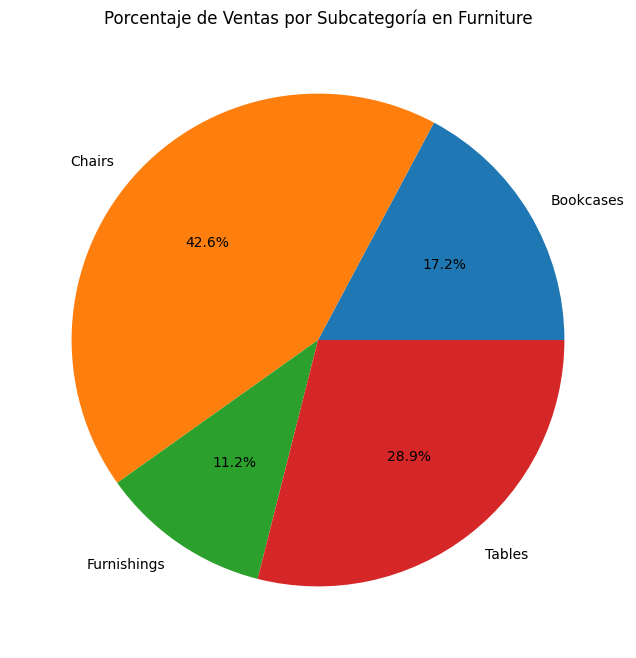

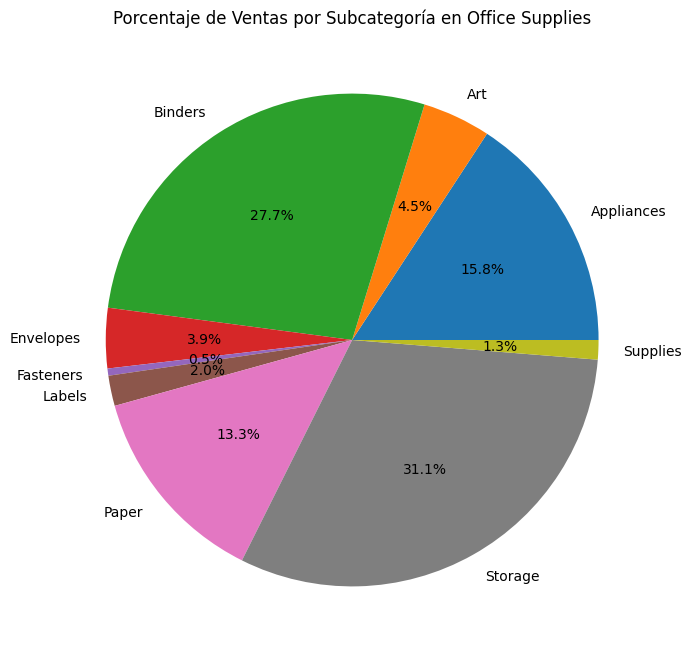

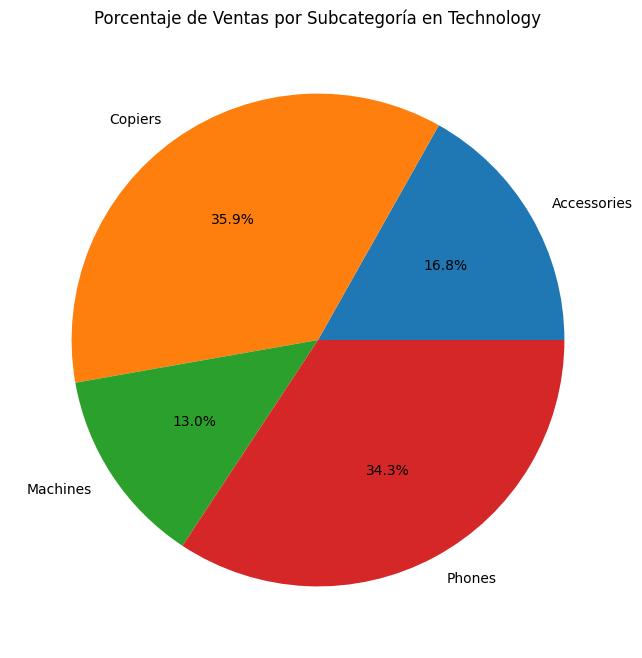

In [104]:
df_agrupado_categoria = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

categorias = df_agrupado_categoria['Category'].unique()

for categoria in categorias:
    df_filtrado = df_agrupado_categoria[df_agrupado_categoria['Category'] == categoria]

    plt.figure(figsize=(8,8))
    plt.pie(df_filtrado['Sales'], labels=df_filtrado['Sub-Category'], autopct='%1.1f%%')
    plt.title(f'Porcentaje de Ventas por Subcategoría en {categoria}')
    plt.show()

### 4. Da un intervalo de confianza para la media de ventas de la tienda principal (la de mayor venta) al 90% y al 98% de confiabilidad. Si consideramos que se van a realizar 500 ventas en dicha tienda da una estimación de cuanto podemos ganar en dicha tienda a las mismas confiabilidades que hemos considerado en el punto anterior.

In [105]:
tienda_principal =df.groupby('City')['Sales'].sum().sort_values(ascending=False).idxmax()
df_tienda = df[df['City'] == tienda_principal]  

df_tienda.shape

(174, 14)

In [106]:
n = len(df_tienda)
media = df_tienda['Sales'].mean()
desv_est = df_tienda['Sales'].std()
print(n,media,desv_est)

174 267.0991034482758 905.8564911874763


In [107]:
confianzas = [0.90, 0.98]
ventas_estimadas=500

In [108]:
for confianza in confianzas:
    alpha = 1 - confianza  
    t_critico = stats.t.ppf(1 - alpha/2, df=n-1) 
    margen_error = t_critico * (desv_est / np.sqrt(n))
    
    intervalo_inf = media - margen_error
    intervalo_sup = media + margen_error
    
    print(f"Intervalo de confianza al {int(confianza*100)}%: ({intervalo_inf:.2f}, {intervalo_sup:.2f})")

    ganancia_min = intervalo_inf * ventas_estimadas
    ganancia_max = intervalo_sup * ventas_estimadas
    
    print(f"Estimación de ganancias en {ventas_estimadas} ventas al {int(confianza*100)}%: ({ganancia_min:.2f}, {ganancia_max:.2f})\n")


Intervalo de confianza al 90%: (153.53, 380.66)
Estimación de ganancias en 500 ventas al 90%: (76767.13, 190331.97)

Intervalo de confianza al 98%: (105.85, 428.35)
Estimación de ganancias en 500 ventas al 98%: (52924.40, 214174.71)



## 5. Verifica si estadísticamente los siguientes estados tienen las mismas ventas. 

*   (a) Washington y Arkansas. 
*   (b) Arkansas y Maryland. 
*   (c) Minnesota y Montana 
*   (d) South Carolina y Connecticut

In [109]:
# pares_estados = [
#     ('Washington', 'Arkansas'),
#     ('Arkansas', 'Maryland'),
#     ('Minnesota', 'Montana'),
#     ('South Carolina', 'Connecticut')
# ]

# alpha = 0.05

# for estado1, estado2 in pares_estados:
#     ventas_estado1 = df[df['State'] == estado1]['Sales']
#     ventas_estado2 = df[df['State'] == estado2]['Sales']
    

#     t_stat, p_valor = stats.ttest_ind(ventas_estado1, ventas_estado2, equal_var=False)  

#     print(f"\nComparación entre {estado1} y {estado2}:")
#     print(f"T-Statistic: {t_stat:.4f}, P-Valor: {p_valor:.4f}")
    
#     if p_valor < alpha:
#         print(f"→ Se RECHAZA la hipótesis nula (H0). Las ventas son significativamente diferentes.")
#     else:
#         print(f"→ No hay suficiente evidencia para rechazar H0. Las ventas podrían ser iguales.")

In [110]:
pares_estados = [
    ('Washington', 'Arkansas'),
    ('Arkansas', 'Maryland'),
    ('Minnesota', 'Montana'),
    ('South Carolina', 'Connecticut')
]

alpha = 0.05

for estado1, estado2 in pares_estados:
    ventas_estado1 = df[df['State'] == estado1]['Sales']
    ventas_estado2 = df[df['State'] == estado2]['Sales']

    n1 = len(ventas_estado1)
    n2 = len(ventas_estado2)
    mu1 = ventas_estado1.mean()
    mu2 = ventas_estado2.mean()
    s1 = ventas_estado1.std(ddof=1)
    s2 = ventas_estado2.std(ddof=1)
    
    print(f"{estado1}: n={n1}, Media={mu1:.2f}, Desv={s1:.2f}")
    print(f"{estado2}: n={n2}, Media={mu2:.2f}, Desv={s2:.2f}")
    print('-'*30)

    gl = n1 + n2 - 2 
    
    s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / gl)
    t_stat = (mu1 - mu2) / (s_pooled * np.sqrt(1/n1 + 1/n2))
    t_critico = stats.t.ppf(1 - alpha/2, gl)
    
    print(f"t_estadístico = {t_stat:.4f}, t_crítico = {t_critico:.4f}")
    
    if np.abs(t_stat) > t_critico:
        print("→ Rechazamos H0: Medias diferentes.\n")
    else:
        print("→ No hay evidencia para rechazar H0.\n")

Washington: n=93, Media=376.00, Desv=1474.42
Arkansas: n=14, Media=215.46, Desv=272.15
------------------------------
t_estadístico = 0.4048, t_crítico = 1.9828
→ No hay evidencia para rechazar H0.

Arkansas: n=14, Media=215.46, Desv=272.15
Maryland: n=21, Media=184.14, Desv=287.72
------------------------------
t_estadístico = 0.3223, t_crítico = 2.0345
→ No hay evidencia para rechazar H0.

Minnesota: n=19, Media=355.00, Desv=708.05
Montana: n=7, Media=126.14, Desv=113.09
------------------------------
t_estadístico = 0.8406, t_crítico = 2.0639
→ No hay evidencia para rechazar H0.

South Carolina: n=6, Media=126.28, Desv=146.86
Connecticut: n=27, Media=162.72, Desv=199.73
------------------------------
t_estadístico = -0.4202, t_crítico = 2.0395
→ No hay evidencia para rechazar H0.



## 6. Verifica si estadísticamente las siguientes subcategorías tienen las mismas ventas: 
-   (a) Accessories y Phones. 
-   (b) Art y Envelopes. 
-   (c) Paper y Storage.

In [115]:
# pares_subcategorias=[
#     ('Accessories','Phones'),
#     ('Art','Envelopes'),
#     ('Paper','Storage')
# ]
# alpha = 0.05
# for sub_cat_1, sub_cat_2 in pares_subcategorias:
#     ventas_sub_cat_1 = df[df['Sub-Category'] == sub_cat_1]['Sales']
#     ventas_sub_cat_2 = df[df['Sub-Category'] == sub_cat_2]['Sales']
#     t_stat, p_valor = stats.ttest_ind(ventas_sub_cat_1, ventas_sub_cat_2, equal_var=False)
#     print(f"\nComparación entre {sub_cat_1} y {sub_cat_2}:")
#     print(f"T-Statistic: {t_stat:.4f}, P-Valor: {p_valor:.4f}")
    
#     if p_valor < alpha:
#         print(f"→ Se RECHAZA la hipótesis nula (H0). Las ventas son significativamente diferentes.")
#     else:
#         print(f"→ No hay suficiente evidencia para rechazar H0. Las ventas podrían ser iguales.")

In [114]:
pares_subcategorias=[
    ('Accessories','Phones'),
    ('Art','Envelopes'),
    ('Paper','Storage')
]

alpha = 0.05

for sub_cat_1, sub_cat_2 in pares_subcategorias:
    ventas_sub_cat_1 = df[df['Sub-Category'] == sub_cat_1]['Sales']
    ventas_sub_cat_2 = df[df['Sub-Category'] == sub_cat_2]['Sales']

    n1 = len(ventas_sub_cat_1)
    n2 = len(ventas_sub_cat_2)
    mu1 = ventas_sub_cat_1.mean()
    mu2 = ventas_sub_cat_2.mean()
    s1 = ventas_sub_cat_1.std(ddof=1)
    s2 = ventas_sub_cat_2.std(ddof=1)
    
    print(f"{sub_cat_1}: n={n1}, Media={mu1:.2f}, Desv={s1:.2f}")
    print(f"{sub_cat_2}: n={n2}, Media={mu2:.2f}, Desv={s2:.2f}")
    print('-'*30)

    gl = n1 + n2 - 2 
    
    s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / gl)
    t_stat = (mu1 - mu2) / (s_pooled * np.sqrt(1/n1 + 1/n2))
    t_critico = stats.t.ppf(1 - alpha/2, gl)
    
    print(f"t_estadístico = {t_stat:.4f}, t_crítico = {t_critico:.4f}")
    
    if np.abs(t_stat) > t_critico:
        print("→ Rechazamos H0: Medias diferentes.\n")
    else:
        print("→ No hay evidencia para rechazar H0.\n")

Accessories: n=161, Media=190.35, Desv=295.45
Phones: n=176, Media=354.29, Desv=463.59
------------------------------
t_estadístico = -3.8314, t_crítico = 1.9671
→ Rechazamos H0: Medias diferentes.

Art: n=148, Media=37.21, Desv=99.77
Envelopes: n=63, Media=77.17, Desv=98.98
------------------------------
t_estadístico = -2.6686, t_crítico = 1.9714
→ Rechazamos H0: Medias diferentes.

Paper: n=272, Media=60.30, Desv=81.33
Storage: n=163, Media=235.10, Desv=287.92
------------------------------
t_estadístico = -9.4122, t_crítico = 1.9655
→ Rechazamos H0: Medias diferentes.



## 7. En función de lo observado hacer comparaciones adicionales que considere pertinentes.

In [112]:
df['Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [ ]:
# pares_categorias=[
#     ('Office Supplies','Technology'),
#     ('Technology','Furniture'),
#     ('Furniture','Office Supplies')
# ]
# alpha = 0.05
# for cat_1, cat_2 in pares_subcategorias:
#     ventas_cat_1 = df[df['Sub-Category'] == cat_1]['Sales']
#     ventas_cat_2 = df[df['Sub-Category'] == cat_2]['Sales']
#     t_stat, p_valor = stats.ttest_ind(ventas_cat_1, ventas_cat_2, equal_var=False)
#     print(f"\nComparación entre {cat_1} y {cat_2}:")
#     print(f"T-Statistic: {t_stat:.4f}, P-Valor: {p_valor:.4f}")
    
#     if p_valor < alpha:
#         print(f"→ Se RECHAZA la hipótesis nula (H0). Las ventas son significativamente diferentes.")
#     else:
#         print(f"→ No hay suficiente evidencia para rechazar H0. Las ventas podrían ser iguales.")


Comparación entre Accessories y Phones:
T-Statistic: -3.9043, P-Valor: 0.0001
→ Se RECHAZA la hipótesis nula (H0). Las ventas son significativamente diferentes.

Comparación entre Art y Envelopes:
T-Statistic: -2.6772, P-Valor: 0.0085
→ Se RECHAZA la hipótesis nula (H0). Las ventas son significativamente diferentes.

Comparación entre Paper y Storage:
T-Statistic: -7.5724, P-Valor: 0.0000
→ Se RECHAZA la hipótesis nula (H0). Las ventas son significativamente diferentes.


In [116]:
pares_categorias=[
    ('Office Supplies','Technology'),
    ('Technology','Furniture'),
    ('Furniture','Office Supplies')
]

alpha = 0.05

for cat_1, cat_2 in pares_categorias:
    ventas_cat_1 = df[df['Category'] == cat_1]['Sales']
    ventas_cat_2 = df[df['Category'] == cat_2]['Sales']

    n1 = len(ventas_cat_1)
    n2 = len(ventas_cat_2)
    mu1 = ventas_cat_1.mean()
    mu2 = ventas_cat_2.mean()
    s1 = ventas_cat_1.std(ddof=1)
    s2 = ventas_cat_2.std(ddof=1)
    
    print(f"{cat_1}: n={n1}, Media={mu1:.2f}, Desv={s1:.2f}")
    print(f"{cat_2}: n={n2}, Media={mu2:.2f}, Desv={s2:.2f}")
    print('-'*30)

    gl = n1 + n2 - 2 
    
    s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / gl)
    t_stat = (mu1 - mu2) / (s_pooled * np.sqrt(1/n1 + 1/n2))
    t_critico = stats.t.ppf(1 - alpha/2, gl)
    
    print(f"t_estadístico = {t_stat:.4f}, t_crítico = {t_critico:.4f}")
    
    if np.abs(t_stat) > t_critico:
        print("→ Rechazamos H0: Medias diferentes.\n")
    else:
        print("→ No hay evidencia para rechazar H0.\n")

Office Supplies: n=1197, Media=102.92, Desv=260.18
Technology: n=381, Media=477.57, Desv=1265.37
------------------------------
t_estadístico = -9.6298, t_crítico = 1.9615
→ Rechazamos H0: Medias diferentes.

Technology: n=381, Media=477.57, Desv=1265.37
Furniture: n=422, Media=356.75, Desv=494.62
------------------------------
t_estadístico = 1.8140, t_crítico = 1.9629
→ No hay evidencia para rechazar H0.

Furniture: n=422, Media=356.75, Desv=494.62
Office Supplies: n=1197, Media=102.92, Desv=260.18
------------------------------
t_estadístico = 13.2925, t_crítico = 1.9614
→ Rechazamos H0: Medias diferentes.



## 8. Da recomendaciones en función de lo que analizó para poner mayor énfasis de marketing en las áreas donde tenemos mejores ventas 

1. Estados:
*   No hay diferencias significativas en ventas entre los pares analizados (ej: Washington vs Arkansas).

*   Acción:

*       Mantén campañas generales en estos estados.

*       Monitorea nichos locales o eventos en estados con muestras pequeñas (ej: South Carolina, Montana).

2. Subcategorías de Productos:
*   Enfócate en:

*       Technology (Media ≈ 477.57), Phones (≈354.29), Furniture (≈356.75) y Storage (≈235.10), que tienen ventas significativamente altas.

*   Revisa estrategias en:

*       Office Supplies, Art y Paper, cuyas ventas son bajas. Considera reasignar recursos si no son estratégicos.

3. Recomendación Integral:
*   **Prioriza**: Campañas segmentadas para Technology, Phones, Furniture y Storage con promociones y alianzas estratégicas.

*   **Mantén vigilancia** en estados con potencial oculto (ej: Minnesota, Washington) y ajusta según tendencias emergentes.